# The Sparks Foundation 
#### Author:- Yamini Jayachandran

Data Science and Business Analyctics Task 3:- <b> Exploratory Data Analysis - Retail </b> <br>

Dataset: https://bit.ly/3i4rbWl (given) <br>
>Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ <br>
>As a business manager, try to find out the weak areas where you can work to make more profit. <br>
>What all business problems you can derive by exploring the data? <br>

**Importing necessary libraries**

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**EDA**

In [3]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Outliers in numeric data**

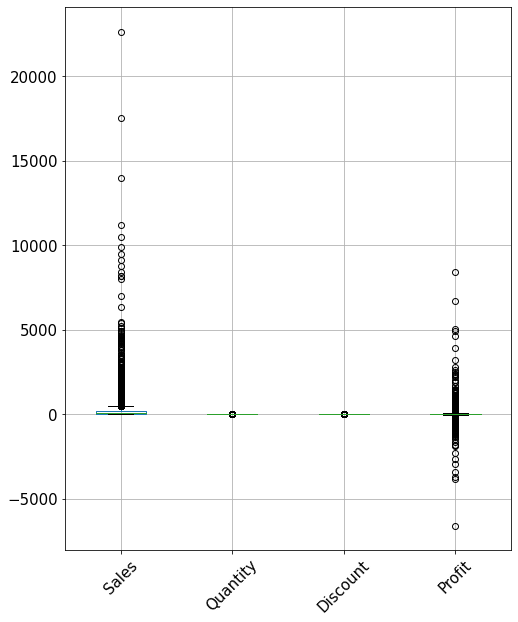

In [5]:
boxplot = df.boxplot(column=["Sales", "Quantity", "Discount", "Profit"], grid=True, rot=45, fontsize=15, figsize=(8,10))

There are outliers present in 'Sales' and 'Profit' but these are important parameters for drawing business/analyctical conclusions. Hence, we remove only those points that are very far from the average 

In [6]:
#Removing outliers
df = df[df['Sales']<8000]
df = df[df['Profit']>-2000]
#boxplot = df.boxplot(column=["Sales", "Quantity", "Discount", "Profit"], grid=True, rot=45, fontsize=15, figsize=(8,10))

**Correlation Heatmap**

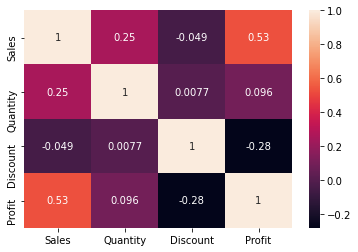

In [7]:
(sb.heatmap(df[["Sales", "Quantity", "Discount", "Profit"]].corr(), annot=True))

**Interpretation of heatmap** <br>
-1: perfect negative linear correlation <br>
+1:perfect positive linear correlation and <br>
0: No correlation <br>

Discount and Profit has strong negative correlation <br>
Sales and Profit has positive correlation <br>


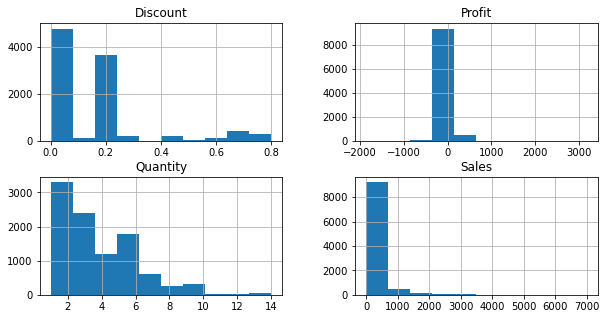

In [8]:
df1=df[["Discount", "Profit", "Quantity", "Sales"]]
hist = df1.hist(bins=10,figsize =(10,5))

## Identifying Weak Areas

### 1. In terms of [Geography](#3): 

1. [Central Region](#1): 
        >Illinois 
        >Texas 
        >North Dakota 
2. [South Region](#2): 
        >Florida, 
        >Tennessee, 
        >North Carolina
### 2. In terms of [category](#4):  


The country column has only one (unique) entry that is United States. <br>

**Country>Region>State>City** <p>
    By net profit alone, weak areas are:

#### In terms of Geography <a id='3'></a>

In [9]:
df=df[['Quantity', 'Discount', 'Sales', 'Profit', 'Region']].set_index('Region').groupby('Region').sum()


print("Mean Quantity= ", df['Quantity'].mean())
print("Mean Discount= ", df['Discount'].mean())
print("Mean Sales= ",    df['Sales'].mean())
print("Mean Profit= ",   df['Profit'].mean())

display(df)

Mean Quantity=  9442.25
Mean Discount=  388.64749999999515
Mean Sales=  534244.919575
Mean Profit=  68674.2364250001


,Quantity,Discount,Sales,Profit
Region,,,,
Central,8730,555.54,450644.5368,32008.6923
East,10593,412.00,633281.4170,88316.7962
South,6194,237.55,352333.4950,49600.5151
West,12252,349.50,700720.2295,104770.9421


**Region wise:** Central<South<East<West.
 <p>                                        

Summarizing the **Central Region:** <br>
**Issue:** Profit < Mean profit <br>
Sales < Mean Sales <br>
Discount > Mean discount <br>
Quantity < Mean quantity <p>
**Solution** <br>
 >Increase Sales (Profit and Sales has positive corr) <br>
 >Reduce Discount (Profit and Dsicount has negative corr) as it is likely that there is repeat customers/ new customers <br>  
    
Summarizing the **South Region:** <br>
**Issue:** Profit < Mean profit <br>
Sales < Mean Sales <br>
Discount < Mean discount <br>
Quantity < Mean quantity <p>
**Solution** <br>
 >Increase Sales (Profit and Sales has positive corr) <br>
 >Increase Discount. Profit and Discount has negative corr but it can be useful to acquire repeated customers/ new customers.Increasing the discount rates could result in better sales, hence better profit<br>   
                
                

**Analysing states that perform poorly in Central Region:** <a id='1'></a>

The list of states in Central Region that performs poorly in terms of mean profit and mean sales are: 
 ['Texas', 'Nebraska', 'Illinois', 'Minnesota', 'Michigan', 'Indiana', 'Iowa', 'Wisconsin', 'Oklahoma', 'Missouri', 'Kansas', 'South Dakota', 'North Dakota']


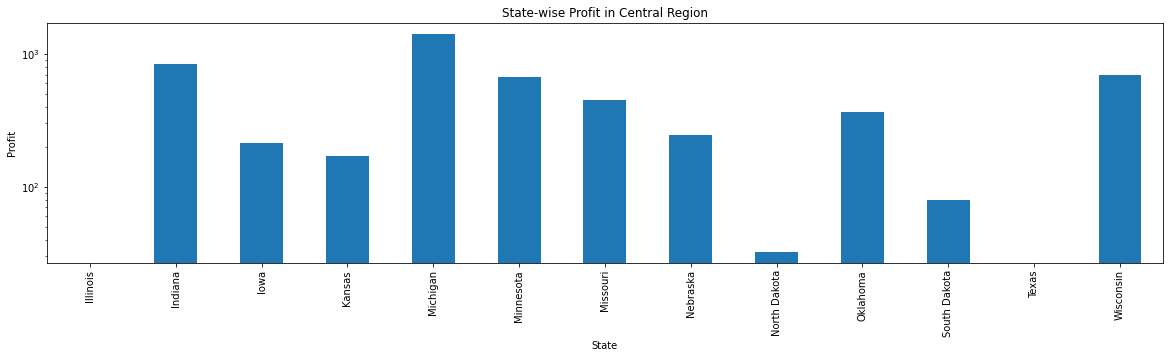

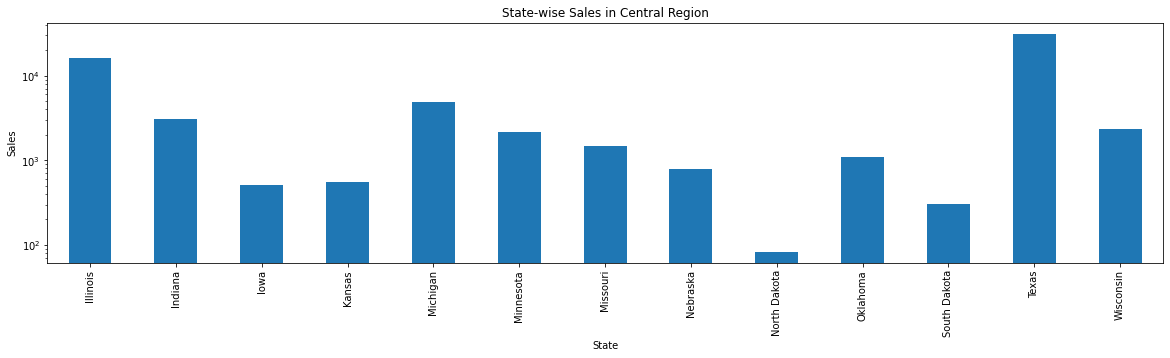

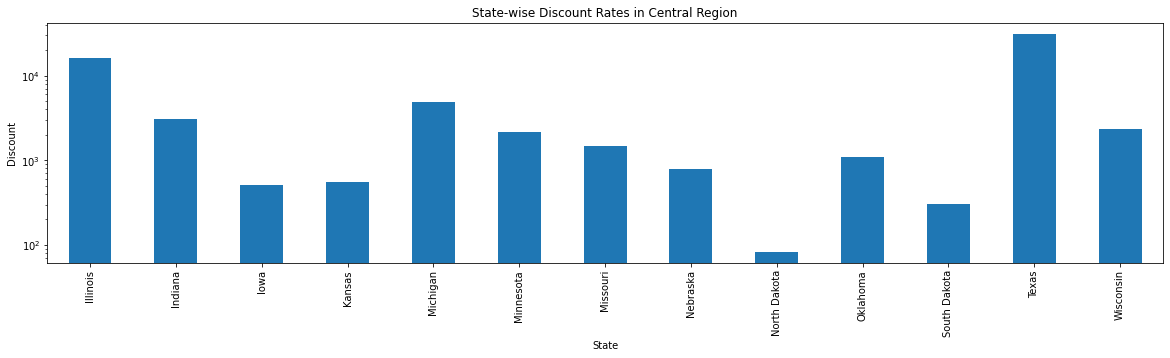

In [10]:
#Read CSV again
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\SampleSuperstore.csv")

#Subsetting rows in Central region with poor profit and sales (when compared to national average or mean)
df=df.loc[(df['Profit'] <= df['Profit'].mean()) & (df['Sales'] <= df['Sales'].mean()) & (df['Region']== 'Central')]
print("The list of states in Central Region that performs poorly in terms of mean profit and mean sales are: \n" ,list(df['State'].unique()))

#Profit Plot
dfp=df.groupby('State')['Profit'].sum()
plt.subplot(311)
dfp.plot(x="State", y="Profit",kind='bar', figsize=(20,15), logy=True, title='State-wise Profit in Central Region')
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()

#Sales plot
dfs=df.groupby('State')['Sales'].sum()
plt.subplot(312)
dfs.plot(x="State", y="Sales",kind='bar', figsize=(20,15), logy=True, title='State-wise Sales in Central Region')
plt.xlabel("State")
plt.ylabel("Sales")
plt.show()

#Discount plot
dfd=df.groupby('State')['Discount'].sum()
plt.subplot(313)
dfs.plot(x="State", y="Discount",kind='bar', figsize=(20,15), logy=True, title='State-wise Discount Rates in Central Region')
plt.xlabel("State")
plt.ylabel("Discount")
plt.show()


State-wise solution(s): <br> In States like **Illinois and Texas**, profit is low but sales and discount is high. Therefore, it can reduce discount rates. <br> In the state of **North Dakota** which performs poorly in all 3 graphs, increase in discount rates could result in higher sales and consequently higher profit.

**Low Profit Cities in Illinois, Texas and North Dakota**

Cities in Illinois, Texas and North Dakota that has low profit are:  Houston,San Antonio,Chicago,Dallas,Aurora


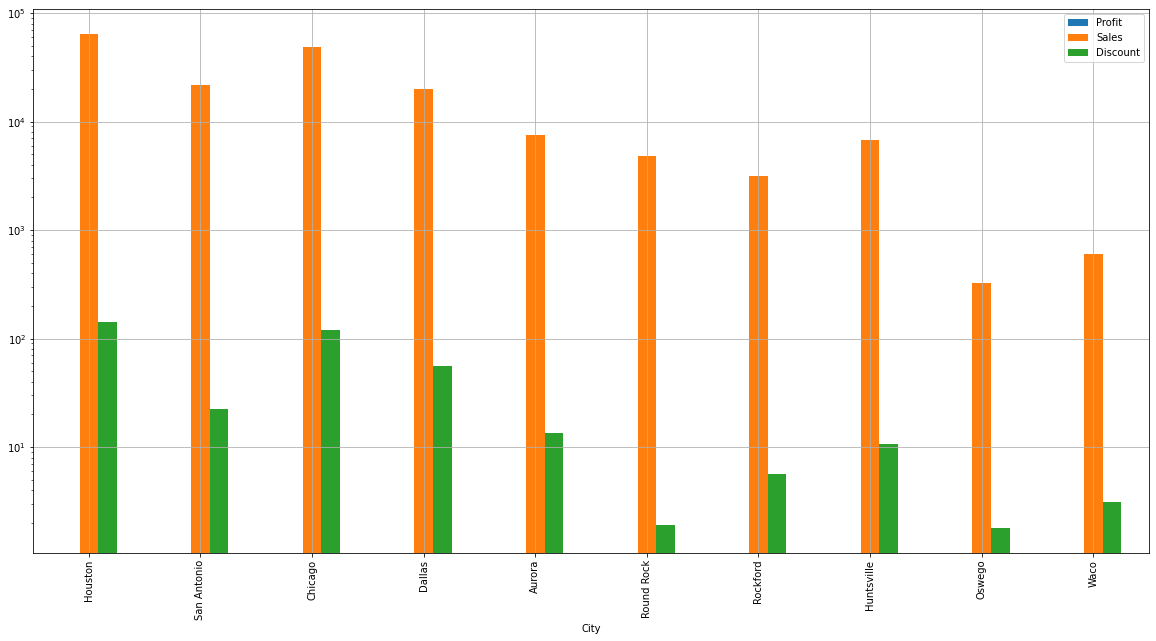

In [11]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\SampleSuperstore.csv")
df=df[['State', 'City', 'Profit', 'Sales', 'Discount']]
df1 =df[df['State'].str.contains("Illinois")|df['State'].str.contains("Texas")|df['State'].str.contains("North Dakota")]

df1=df1.groupby('City').sum()
df1=df1.sort_values(by=['Profit'])
df1.iloc[0:10].plot(kind='bar', figsize=(20,10), grid=True, logy=True)
print("Cities in Illinois, Texas and North Dakota that has low profit are: ", ','.join(list(df1.head().index.values)))


#### <a id='2'></a>**Analysing states that perform poorly in South Region:**

The list of states in South Region that performs poorly in terms of mean profit and mean sales are: 
 Florida, North Carolina, Tennessee, Alabama, Louisiana, Virginia, Georgia, Kentucky, Mississippi, Arkansas, South Carolina


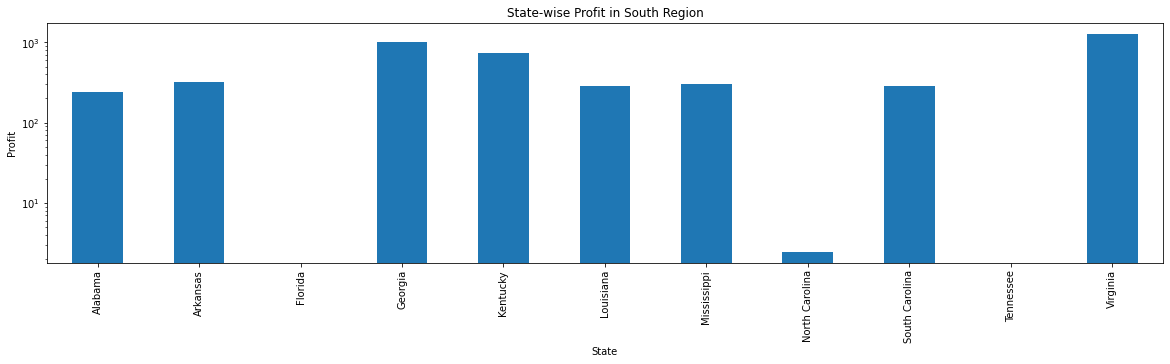

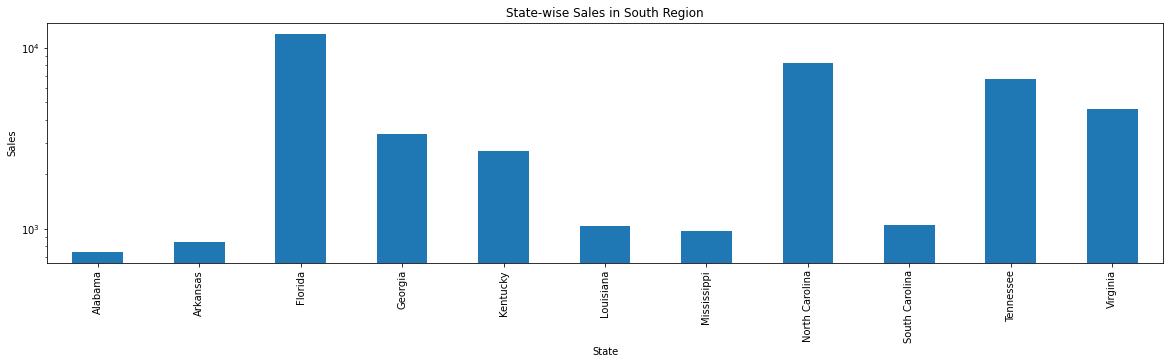

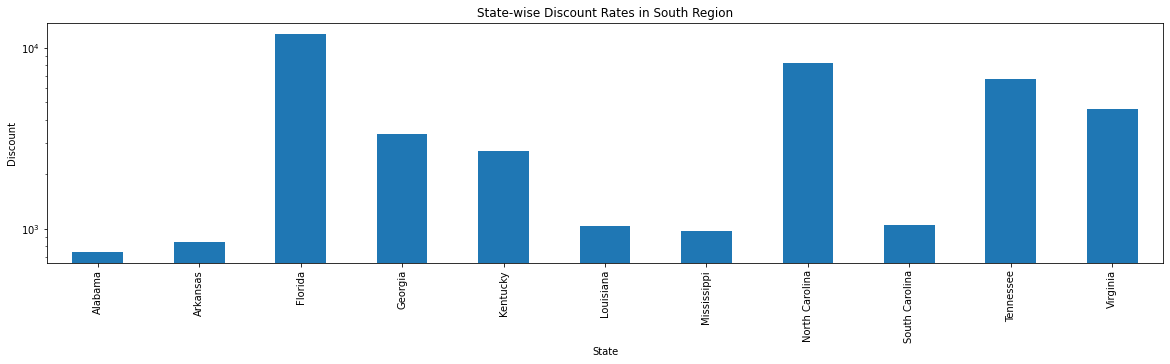

In [12]:
#Read CSV again
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\SampleSuperstore.csv")

#Subsetting rows in South region with poor profit and sales (when compared to national average or mean)
df=df.loc[(df['Profit'] <= df['Profit'].mean()) & (df['Sales'] <= df['Sales'].mean()) & (df['Region']== 'South')]
print("The list of states in South Region that performs poorly in terms of mean profit and mean sales are: \n",', '.join(list(df['State'].unique())))


#Profit Plot
plt.subplot(3,1,1)
dfp=df.groupby('State')['Profit'].sum()
dfp.plot(x="State", y="Profit",kind='bar', figsize=(20,15), logy=True, title='State-wise Profit in South Region')
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()

#Sales plot
plt.subplot(3,1,2)
dfs=df.groupby('State')['Sales'].sum()
dfs.plot(x="State", y="Sales",kind='bar', figsize=(20,15), logy=True, title='State-wise Sales in South Region')
plt.xlabel("State")
plt.ylabel("Sales")
plt.show()

#Discount plot
plt.subplot(3,1,3)
dfd=df.groupby('State')['Discount'].sum()
dfs.plot(x="State", y="Discount",kind='bar', figsize=(20,15), logy=True, title='State-wise Discount Rates in South Region')
plt.xlabel("State")
plt.ylabel("Discount")
plt.show()

State-wise solution(s): <br> In States like **Florida and Tennessee and North Carolina**, profit is low but sales and discount is high. Therefore, it can reduce discount rates. <br> <p>
    
**Cities in Florida and Tennessee and North Carolina that are low in profit**

Cities in Florida and Tennessee and North Carolina, that has low profit are:  Burlington,Jacksonville,Concord,Memphis,Knoxville


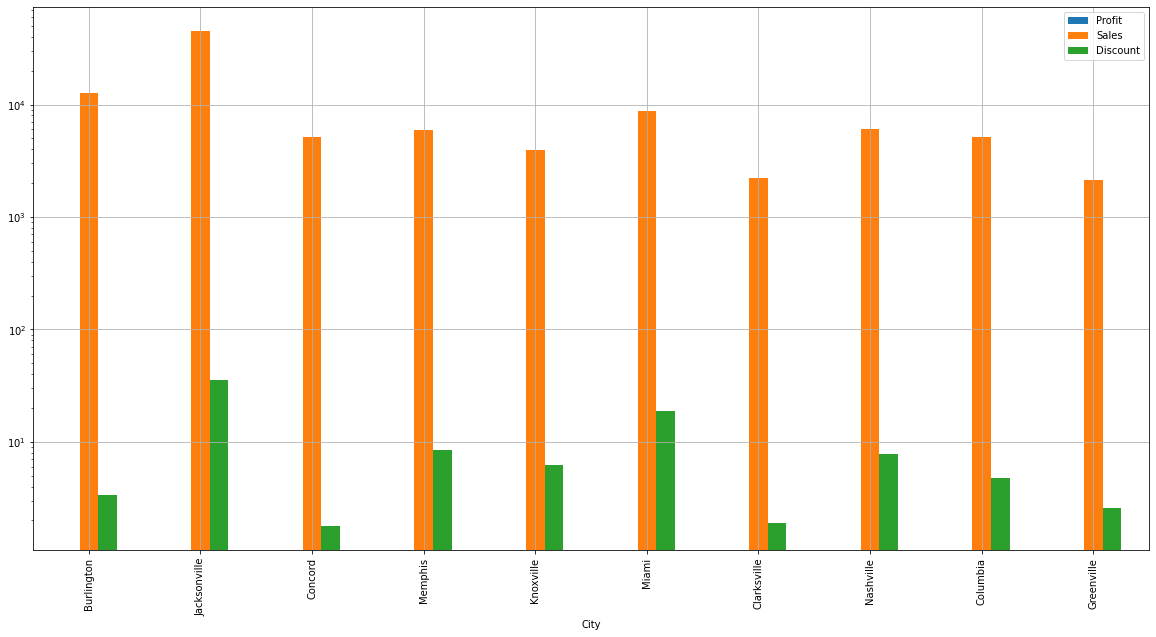

In [13]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\SampleSuperstore.csv")
df=df[['State', 'City', 'Profit', 'Sales', 'Discount']]
df1 =df[df['State'].str.contains("Florida")|df['State'].str.contains("Tennessee")|df['State'].str.contains("North Carolina")]

df1=df1.groupby('City').sum().sort_values(by=['Profit'])
df1.iloc[0:10].plot(kind='bar', figsize=(20,10), grid=True, logy=True)
print("Cities in Florida and Tennessee and North Carolina, that has low profit are: ", ','.join(list(df1.head().index.values)))

## In terms of **Category** <a id='4'></a>

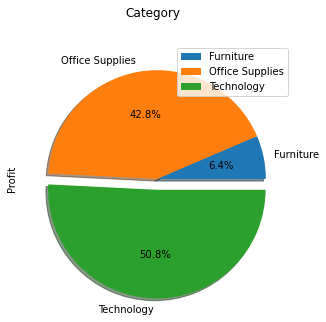

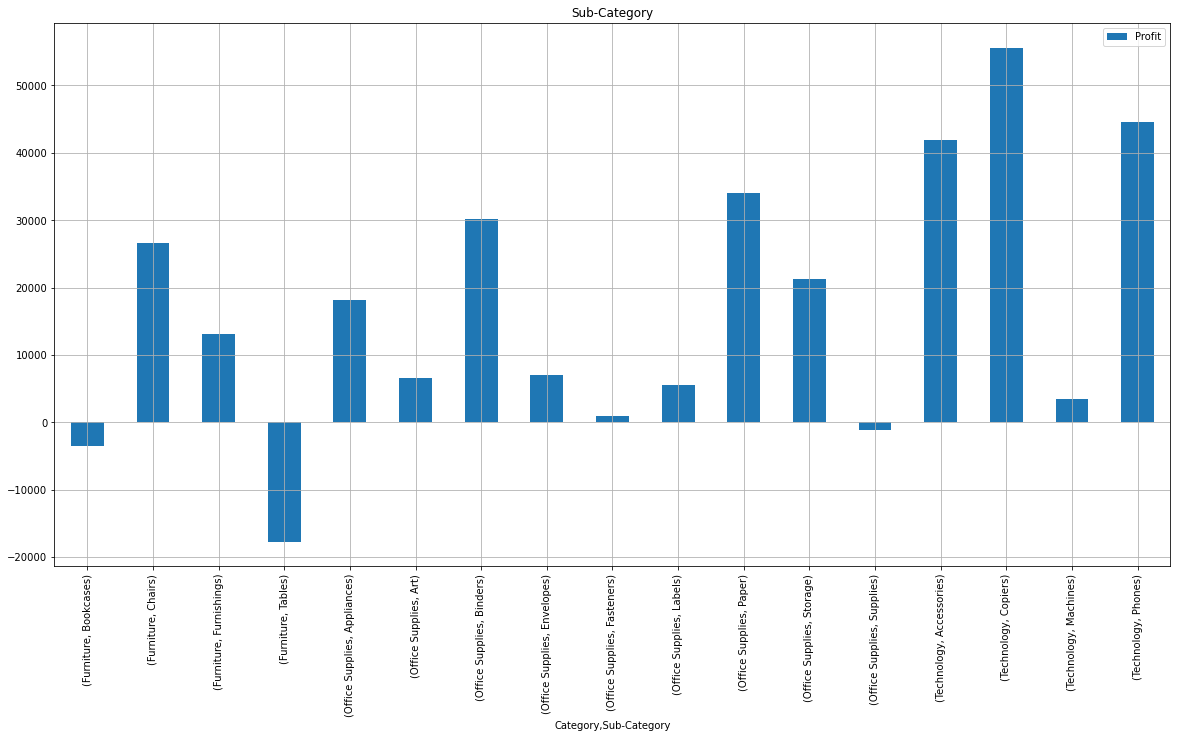

In [14]:

df=pd.read_csv(r"C:\Users\ADMIN\Downloads\SampleSuperstore.csv", index_col=6) #Region wise
a=df[['Sales', 'Quantity', 'Discount', 'Profit','Category', 'Sub-Category']].groupby(['Category']).sum()
b=df[['Sales', 'Quantity', 'Discount', 'Profit','Category', 'Sub-Category']].groupby(['Category','Sub-Category']).sum()

a.plot(title='Category',kind='pie', subplots=True, figsize=(5,5), y='Profit', autopct='%1.1f%%', explode=(0, 0, 0.1), shadow=True, startangle=0)
b.plot(title='Sub-Category',kind='bar', figsize=(20,10), y='Profit', grid=True )


## Combining Regions and Cateogories

Enter Region for Analysis South
The States in South  Region are:  Kentucky, Florida, North Carolina, Virginia, Tennessee, Alabama, South Carolina, Louisiana, Georgia, Mississippi, Arkansas
Enter State for Analysis Kentucky
The Cities in Kentucky  are:  Henderson, Richmond, Louisville, Florence, Murray, Bowling Green, Georgetown, Owensboro
City-wise analysis of which city? Henderson


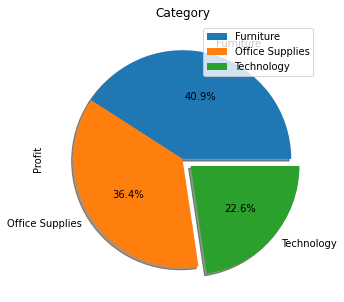

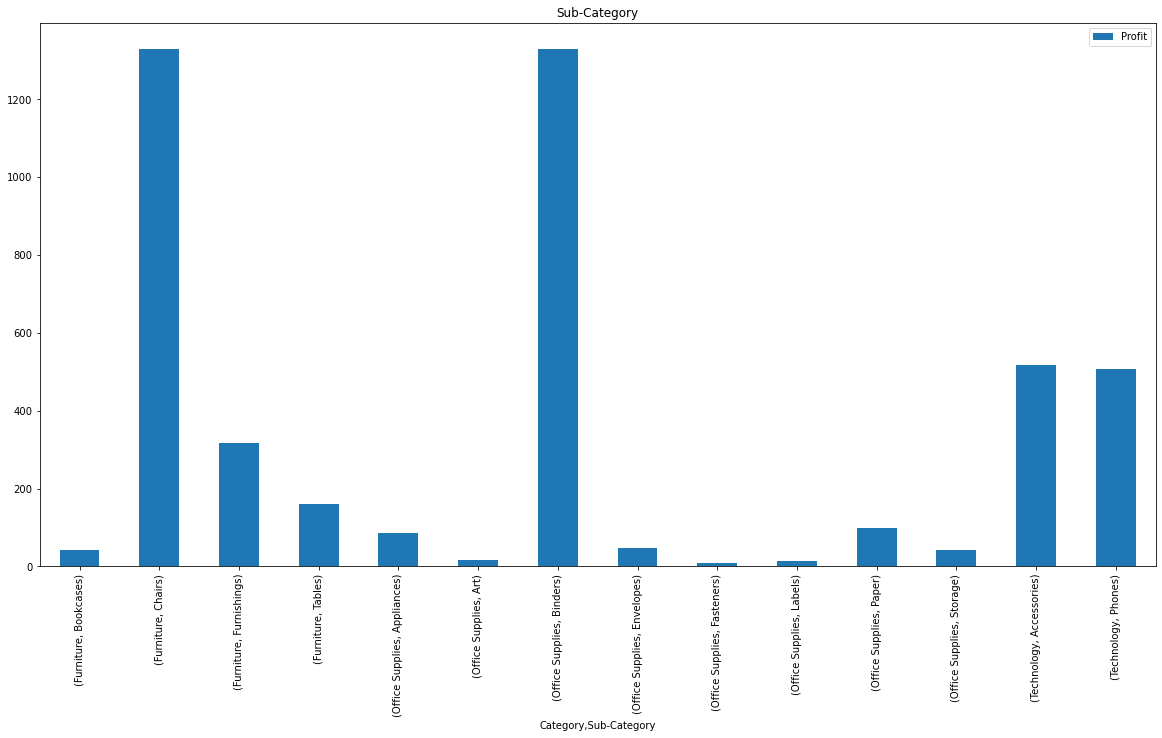

In [15]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\SampleSuperstore.csv", index_col=0) #State
df[['Sales', 'Quantity', 'Discount', 'Profit','Category', 'Sub-Category', 'Region', 'State', 'City']]



reg=input('Enter Region for Analysis ')
dfr=df[df['Region'].str.contains(reg)]
print("The States in", reg," Region are: ",  ', '.join(list(dfr['State'].unique())))
st=input('Enter State for Analysis ')
dfs=dfr[dfr['State'].str.contains(st)]
print("The Cities in", st," are: ",  ', '.join(list(dfs['City'].unique())))
city=input("City-wise analysis of which city? ")
dfc=dfs[dfs['City'].str.contains(city)]


a=dfc.groupby(['Category']).sum()
b=dfc.groupby(['Category','Sub-Category']).sum()

a.plot(title='Category',kind='pie', figsize=(5,5), y='Profit', autopct='%1.1f%%', explode=(0, 0, 0.1), shadow=True, startangle=0)
plt.show()
b.plot(title='Sub-Category', kind='bar', y='Profit', figsize=(20,10))
plt.show()

## Comparing Category-wise Profit of any 2 Places

Enter a region/state/city Ohio
Enter the second region/state/city to compare with the first Central


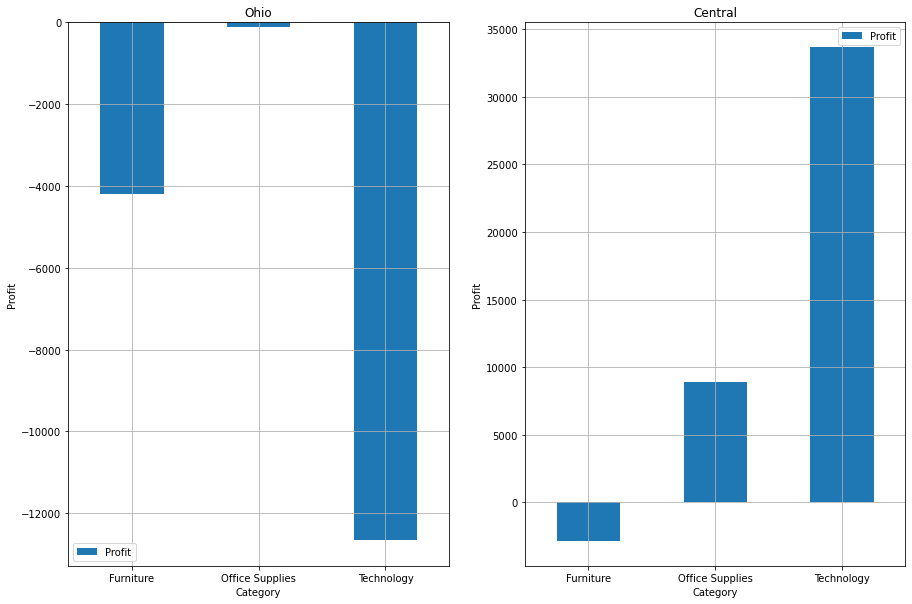

In [16]:
import pandas as pd

place1=input("Enter a region/state/city ")
place2=input("Enter the second region/state/city to compare with the first ")

df=df[['Sales', 'Quantity', 'Discount', 'Profit','Category', 'Sub-Category', 'Region', 'State', 'City']]

df1=df[df['State'].str.contains(place1)|df['Region'].str.contains(place1)|df['City'].str.contains(place1)]
df1[['Sales', 'Quantity', 'Discount', 'Profit','Category']]
a=df1.groupby(['Category']).sum()


df1=df[df['State'].str.contains(place2)|df['Region'].str.contains(place2)|df['City'].str.contains(place2)]
df1[['Sales', 'Quantity', 'Discount', 'Profit','Category']]
b=df1.groupby(['Category']).sum()

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Category')
ax1.set_ylabel('Profit')
ax1.set_title("Category v/s Profit for Place 1")
a.plot(y='Profit', kind='bar', ax=ax1, grid=True, rot=0, title=place1)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Category')
ax2.set_ylabel('Profit')
ax2.set_title("Category v/s Profit for Place 2")
b.plot(y='Profit',kind='bar', ax=ax2, grid=True, rot=0, title=place2)

# Business problems we can derive by exploring data

1. Identify which variables which doesn't make an impact on businesses <br>
2. Weak areas, weak categories and possibly derive patterns <br>